#  Rastrigin function optimization (max).
---
Description:

- Optimization (max)
- Single-objective
- Constraints (no)
---

The general equation is given by:

$f(\mathbf{x}) = An + \sum_{i=1}^{n} [x_i^2 - A\cos(2 \pi x_i)]$, with  $-5.12 \le x_i \le +5.12$, and $A = 10$.

According to [Rastrigin function](https://en.wikipedia.org/wiki/Rastrigin_function) for a given number of dimensions $n$ the maximum can be found accordingly.

To test here the code we set $n=5$, which gives the maximum of $201.7664509$ at coordinates $x_i \in [\pm 4.52299366, ..., \pm 4.52299366]$.

### First we import python libraries and set up the directory of our code.

In [1]:
import os, sys
import numpy as np
from math import fsum, isclose
from matplotlib import pyplot as plt

PROJECT_DIR = os.path.abspath('..')

if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [2]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.standard_ga import StandardGA
from pygenalgo.utils.utilities import cost_function

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.meta_crossover import MetaCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.meta_mutator import MetaMutator

### Define the Rastrigin function, which plays also the role of the 'fitness' function.

In addition, we define the 'boundary_x' which takes the role of the 'random()' method of the Genes. Every time we
want to 'mutate' a gene this function will be called and assign a 'valid', but random value to the gene.

In [3]:
# Rastrigin function.
@cost_function
def fun_Rastrigin(individual: Chromosome):
    
    # Setup the model parameters.
    A, n = 10.0, len(individual)
    
    # Function value.
    f_value = A*n + fsum([xi**2 - A*np.cos(2.0*np.pi*xi) for xi in individual.values()])

    # Condition for termination.
    solution_found = isclose(f_value, 201.7664509, abs_tol=1.0e-6)
    
    # Return the solution tuple.
    return f_value, solution_found
# _end_def_

# Random number generator.
rng = np.random.default_rng()

# Random boundary function ~U(-5.12, +5.12).
boundary_x = lambda: rng.uniform(-5.12, +5.12)

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by 'boundary_x'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [4]:
# Define the number of genes.
M = 5

# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(rng.uniform(-5.0, +5.0), boundary_x)
                          for _ in range(M)], np.nan, True)
              for _ in range(N)]

# Create the StandardGA object that will carry on the optimization.
test_GA = StandardGA(initial_pop=population,
                     fit_func=fun_Rastrigin,
                     select_op=LinearRankSelector(),
                     mutate_op=MetaMutator(),
                     crossx_op=MetaCrossover())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter,
such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [5]:
test_GA(epochs=1000, elitism=True, f_tol=1.0e-8, adapt_probs=True, verbose=False)

12/05/2025 10:27:43 INFO: Initial Avg. Fitness = 91.9622
12/05/2025 10:27:59 WARNING: StandardGA finished in 957 iterations.
12/05/2025 10:27:59 INFO: Final   Avg. Fitness = 195.6910


Elapsed time: 16.450 seconds.


In [6]:
# Extract the optimal solution from the GA.
optimal_solution = test_GA.best_chromosome()

# Extract the fitness value from the optimal solution.
optimal_fit = optimal_solution.fitness

# Display the (final) optimum value.
print(f"Maximum Found: {optimal_fit:.6f}\n")

# Display each gene value separately.
for i, xi in enumerate(optimal_solution.values()):
    print(f"x{i} = {xi:>10.6f}")
# _end_for_

# True maximum: 201.7664509.

Maximum Found: 201.766450

x0 =  -4.522967
x1 =  -4.522967
x2 =  -4.522967
x3 =  -4.522967
x4 =  -4.522967


**Note that the above solution is indeed very close to the absolute maximum!**

### Visualize the adapted probabilities.

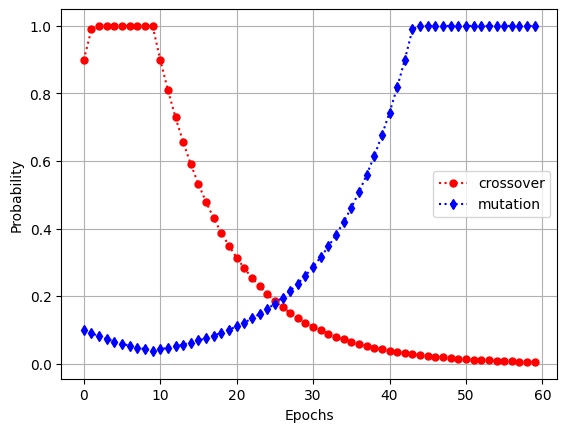

In [7]:
plt.plot(test_GA.stats["prob_crossx"],
         'ro:', markersize=5, label="crossover")

plt.plot(test_GA.stats["prob_mutate"],
         'bd:', markersize=5, label="mutation")

plt.xlabel("Epochs")

plt.ylabel("Probability")

plt.legend()

plt.grid()

### End of file